# 1.0 Importação das bibliotecas necessárias

In [521]:
import pandas as pd
import duckdb as dd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import tabela_analise_global, tabela_analise_condicional, executa_query_dd

## 1.1 Importação dos dados 

In [522]:
df_pesquisa = pd.read_excel(r"base_case.xlsx", sheet_name="base_pesquisa")
df_base_canal_voz = pd.read_excel(r"base_Case.xlsx", sheet_name="base_canal_voz")
df_base_principal = pd.read_excel(r"base_Case.xlsx", sheet_name="base_case_1")


In [523]:
print(df_pesquisa['código aluno (chave)'].nunique())
print(df_base_canal_voz['código aluno (chave)'].nunique())
print(df_base_principal['código aluno (chave)'].nunique())


120067
22828
3124


## 1.2 investigando duplicidade

In [524]:
df_pesquisa['código aluno (chave)'].value_counts().sort_values(ascending=False)

código aluno (chave)
becdcfd84228610aab751a798357d77a64b71d480cfd7bd0075c993a17d4de8d    4
315385ec43375529a9b6feda4681ab86eb142022daf86a4a70fe529558f14965    4
7db38b0ddf3c1afee49fdac687390ce898e526536da2d4a244ae1126b229d426    4
79c7e6c15c14f357fa231957aa15c501c2e8d6c3400e04d1eb7977519bee28f5    4
280a86f0ba06d36ca3fddc20db07a3de2a61b9bcb94b1fcd9fe6545b9141a7f7    4
                                                                   ..
f9ddf4019941c4b24f57b63fd13d1dcbd1c6fc068ae017d32057617beeb6c43d    1
678d10f37578dd4cfabc52cc2bb7d0a14779f14fc50d62f3841a512185fa8498    1
9cca9f48dc6f3d2c3f7570cbdddc248398e191fccc72824a889615bd5733bdc9    1
60063321bf86ee6eb24907e24d37bee13a8afdc29f18b838ebd5fb54cba9ad59    1
a4ab3a92923b8311db88a58233441f4e468ff958de46bdce67f2eb604d4c78bc    1
Name: count, Length: 120067, dtype: int64

In [525]:
df_base_canal_voz['código aluno (chave)'].value_counts().sort_values(ascending=False)


código aluno (chave)
a464bcb300b4cdfacec8cd4f52f7c3c3e839bf85963d0115d1b0f860190ab9a5    60
0945b730b0c72c6aa0b9d61ed6ccec76f831fd26a739a0e12a55ba2646537c59    47
028c2c051691c7f5cd431b55ac087b1243234958f62b917e5bac4281fd2231cb    47
4ed44ed7c16b75557ab2ac7f4772968c4f1c69f434c6d466ccf95299f7cf5aa5    46
9148a93385bad0d11dacf6f26d9a66e49c15dddbb82f67014404f09804c891ac    43
                                                                    ..
3fef686ea0b6c9ded931e7bf36ba0a71bf946b809b740c12c8d4172a3c80eddd     1
eb433ddcf471b4a092245a3c79fab09eafc7b78e13bce31d7c079afeda9aed68     1
729001106595a6c0d948c4588344191a132f60b6a8d44c7a980c408c879ceb19     1
32cc30a53d6d0252e2ce7f04e0a00cea283fcd10590f99032bd87370c60651d0     1
3bfecbb20b21bc9b9c1ef4a11872abdf496c22f531d9561e376af63146b0b54e     1
Name: count, Length: 22828, dtype: int64

In [526]:
df_base_principal['código aluno (chave)'].value_counts().sort_values(ascending=False)


código aluno (chave)
e4337c1185926ed0c05285852082921f012affcb64cd2fbcc8ce5eaa64827e79    22
09b1125e45892a1bc43f790db3ce1b1b1d8d0013b87591b9a9d306e7e48e075e    21
b92a84517c4605c302d323069ecc42c5b13548cdbcc1b3b438625b354660af5e    19
d5e89d5991b04fffdbe4198f3d5ad1e7c71111e514aad45ce04caa49f14d9795    13
25c54850d548dc9feb668c30de6870bd3cb163efa9e9106c1e88d857cf969870    12
                                                                    ..
264dc802b054b6c2c8bc2f2c8657915def603383b48af1a89fd95020484e478f     1
2ebfe25c684ba032eb830fbafc35f4c23c962526347e1c857c218c0acaa8bd7a     1
8dd6797d700911ba793f09afe8b141144327bbd62823c520ce5dc7f634bfd13d     1
740654b2eb8c9cd9af8b0b745aec683c3ba091f9562ae8ea01ba08c55836b6fc     1
6896e69f20e8de4e626a8e3639ca60558c465ec8e5b422e0a46d95321024a068     1
Name: count, Length: 3124, dtype: int64

# 2.0 EDA

## 2.1 Importação das bases tratadas

In [527]:
df_nps = executa_query_dd(
    'Queries/querie_pesquisa.sql',
    tabelas={'df_pesquisa': df_pesquisa,
             "df_base_principal": df_base_principal,
             "df_base_canal_voz": df_base_canal_voz
             })





df_estudo_tempo_atendimento = executa_query_dd(
    'Queries/querie_analise_contato.sql',
    tabelas={
             "df_base_principal": df_base_principal
             })


df_estudo_canal_voz = executa_query_dd(
    'Queries/querie_canal_voz.sql',
    tabelas={
             "df_base_canal_voz": df_base_canal_voz
             })

## 2.2 Análise tempo de atendimento e resposta do atendimento (Base_case_1)

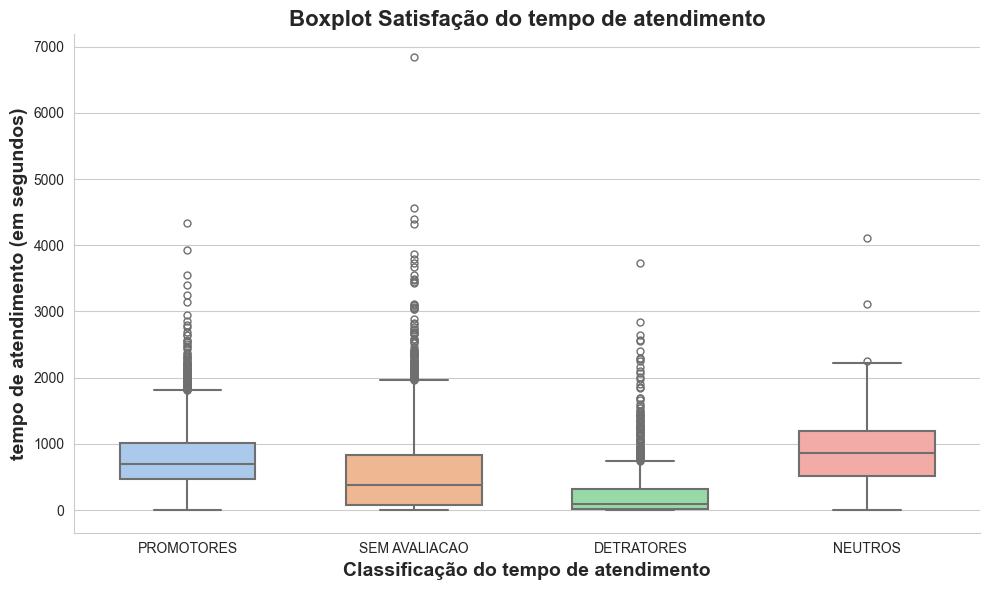

In [529]:
#Análise em relação ao tempo de atendimento da pesquisa

plt.figure(figsize=(10,6))


sns.set_style("whitegrid")

ax = sns.boxplot(
    data=df_estudo_tempo_atendimento,
    x='resposta_tempo_atendimento',      
    y='DURACAO_CONTATO_EM_SEG',          
    palette='pastel',   
    width=0.6,          
    fliersize=5,        
    linewidth=1.5       
)


ax.set_title("Boxplot Satisfação do tempo de atendimento", fontsize=16, fontweight='bold')
ax.set_xlabel("Classificação do tempo de atendimento", fontsize=14, fontweight='bold')
ax.set_ylabel("tempo de atendimento (em segundos)", fontsize=14, fontweight = 'bold')

sns.despine()

plt.tight_layout()
plt.show()

In [530]:
df_estudo_tempo_atendimento['MEDIA_TEMPO_POR_ALUNO'] = df_estudo_tempo_atendimento.groupby('código aluno (chave)')['DURACAO_CONTATO_EM_SEG'].transform('mean')
q = df_estudo_tempo_atendimento['MEDIA_TEMPO_POR_ALUNO'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

df_estudo_tempo_atendimento['Decil Tempo Atendimento'] = df_estudo_tempo_atendimento['MEDIA_TEMPO_POR_ALUNO'].apply(
    lambda x: 'DECIL 1' if x <= q.loc[0.1] else
              'DECIL 2' if x <= q.loc[0.2] else
              'DECIL 3' if x <= q.loc[0.3] else
              'DECIL 4' if x <= q.loc[0.4] else
              'DECIL 5' if x <= q.loc[0.5] else
              'DECIL 6' if x <= q.loc[0.6] else
              'DECIL 7' if x <= q.loc[0.7] else
              'DECIL 8' if x <= q.loc[0.8] else
              'DECIL 9' if x <= q.loc[0.9] else
              'MÁXIMO'
)




In [531]:
df_estudo_tempo_atendimento[df_estudo_tempo_atendimento['resposta_tempo_atendimento'] == 'DETRATORES']['duração do contato (seg)'].describe()

count     912.000000
mean      272.880482
std       441.588946
min         0.000000
25%        21.750000
50%        96.000000
75%       311.250000
max      3738.000000
Name: duração do contato (seg), dtype: float64

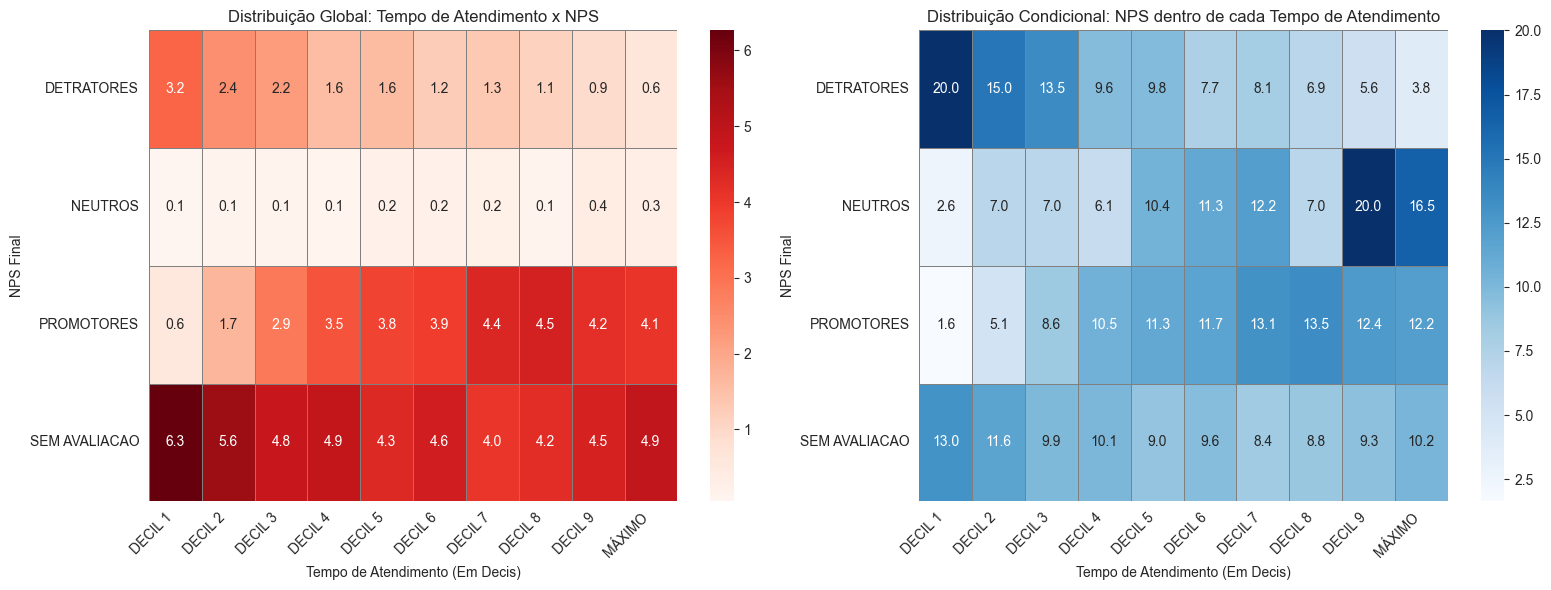

In [532]:
analise_tempo_atendimento = tabela_analise_global(df_estudo_tempo_atendimento, 'resposta_tempo_atendimento', 'Decil Tempo Atendimento') 
est_cond_tempo_atendimento= tabela_analise_condicional(df_estudo_tempo_atendimento, 'resposta_tempo_atendimento', 'Decil Tempo Atendimento')


est_global_tempo_atendimento = analise_tempo_atendimento.pivot(index='resposta_tempo_atendimento', columns='Decil Tempo Atendimento', values='Percentual')

est_cond_tempo_atendimento_pivot = est_cond_tempo_atendimento.pivot(index='resposta_tempo_atendimento', columns='Decil Tempo Atendimento', values='Percentual')





fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(est_global_tempo_atendimento, 
            annot=True, 
            cmap="Reds", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[0])

axes[0].set_title('Distribuição Global: Tempo de Atendimento x NPS')
axes[0].set_xlabel('Tempo de Atendimento (Em Decis)')
axes[0].set_ylabel('NPS Final')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


sns.heatmap(est_cond_tempo_atendimento_pivot, 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[1])

axes[1].set_title('Distribuição Condicional: NPS dentro de cada Tempo de Atendimento')
axes[1].set_xlabel('Tempo de Atendimento (Em Decis)')
axes[1].set_ylabel('NPS Final')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()


In [533]:
analise_por_motivo = tabela_analise_global(df_estudo_canal_voz, 'NPS_CANAL_VOZ', 'Motivo_Macro') 

est_canal_voz_por_motivo= tabela_analise_condicional(df_estudo_canal_voz, 'NPS_CANAL_VOZ', 'Motivo_Macro')



est_canal_voz_por_motivo[est_canal_voz_por_motivo['NPS_CANAL_VOZ'] == 'DETRATORES'].head(10).assign(PERCENTUAL_ACUMULADO = lambda x: x['Percentual'] + x['Percentual'].shift(-1))






,NPS_CANAL_VOZ,Motivo_Macro,Contagem,Percentual,PERCENTUAL_ACUMULADO
31,DETRATORES,OUTROASSUNTO,587,34.127907,50.697674
38,DETRATORES,TRANCARECANCELAR,285,16.569767,24.302326
5,DETRATORES,AVA,133,7.732558,13.313953
25,DETRATORES,MENUMATRICULAEADPTC,96,5.581395,8.953488
33,DETRATORES,PORTAL,58,3.372093,6.744186
37,DETRATORES,SWITCHWHATSAPP,58,3.372093,6.569767
20,DETRATORES,INFORMARPAGAMENTO,55,3.197674,5.930233
13,DETRATORES,DOCUMENTOESTÁGIO,47,2.732558,5.232558
26,DETRATORES,MENUMATRICULAEADPTK,43,2.500000,5.000000
23,DETRATORES,MENUMATRICULAEAD,43,2.500000,NaN


In [534]:
est_canal_voz_por_motivo[est_canal_voz_por_motivo['NPS_CANAL_VOZ'] == 'PROMOTORES'].head(10).assign(PERCENTUAL_ACUMULADO = lambda x: x['Percentual'] + x['Percentual'].shift(-1))


,NPS_CANAL_VOZ,Motivo_Macro,Contagem,Percentual,PERCENTUAL_ACUMULADO
121,PROMOTORES,OUTROASSUNTO,8100,30.914851,52.761345
130,PROMOTORES,TRANCARECANCELAR,5724,21.846494,28.384413
115,PROMOTORES,MENUMATRICULAEADPTC,1713,6.537918,11.770543
84,PROMOTORES,AVA,1371,5.232625,8.675241
112,PROMOTORES,MENUMATRICULAEAD,902,3.442617,6.698218
124,PROMOTORES,PORTAL,853,3.255601,6.163887
95,PROMOTORES,DOCUMENTOESTÁGIO,762,2.908286,5.679173
116,PROMOTORES,MENUMATRICULAEADPTK,726,2.770887,5.301324
109,PROMOTORES,INFORMARPAGAMENTO,663,2.530438,4.690661
129,PROMOTORES,SWITCHWHATSAPP,566,2.160223,NaN


In [535]:
est_canal_voz_por_motivo[est_canal_voz_por_motivo['NPS_CANAL_VOZ'] == 'SEM AVALIACAO'].head(10).assign(PERCENTUAL_ACUMULADO = lambda x: x['Percentual'] + x['Percentual'].shift(-1))


,NPS_CANAL_VOZ,Motivo_Macro,Contagem,Percentual,PERCENTUAL_ACUMULADO
173,SEM AVALIACAO,OUTROASSUNTO,11264,37.693672,55.677141
185,SEM AVALIACAO,TRANCARECANCELAR,5374,17.983469,22.601479
138,SEM AVALIACAO,AVA,1380,4.618010,9.105511
166,SEM AVALIACAO,MENUMATRICULAEADPTC,1341,4.487501,7.910852
177,SEM AVALIACAO,PORTAL,1023,3.423351,6.358130
149,SEM AVALIACAO,DOCUMENTOESTÁGIO,877,2.934779,5.585115
163,SEM AVALIACAO,MENUMATRICULAEAD,792,2.650336,5.153432
160,SEM AVALIACAO,INFORMARPAGAMENTO,748,2.503095,4.925878
184,SEM AVALIACAO,SWITCHWHATSAPP,724,2.422782,4.781983
172,SEM AVALIACAO,NÃOCONCORDAVALOR,705,2.359201,NaN


In [536]:
est_canal_voz_por_motivo[est_canal_voz_por_motivo['NPS_CANAL_VOZ'] == 'NEUTROS'].head(10).assign(PERCENTUAL_ACUMULADO = lambda x: x['Percentual'] + x['Percentual'].shift(-1))


,NPS_CANAL_VOZ,Motivo_Macro,Contagem,Percentual,PERCENTUAL_ACUMULADO
69,NEUTROS,OUTROASSUNTO,235,29.228856,47.636816
76,NEUTROS,TRANCARECANCELAR,148,18.407960,25.621891
44,NEUTROS,AVA,58,7.213930,13.059701
71,NEUTROS,PORTAL,47,5.845771,11.442786
65,NEUTROS,MENUMATRICULAEADPTC,45,5.597015,10.074627
61,NEUTROS,INFORMARPAGAMENTO,36,4.477612,8.706468
53,NEUTROS,DOCUMENTOESTÁGIO,34,4.228856,7.587065
68,NEUTROS,NÃOCONCORDAVALOR,27,3.358209,6.094527
63,NEUTROS,MENUMATRICULAEAD,22,2.736318,4.975124
75,NEUTROS,SWITCHWHATSAPP,18,2.238806,NaN


## 2.3 Análise de tempo de atendimento e satisfação no canal de voz

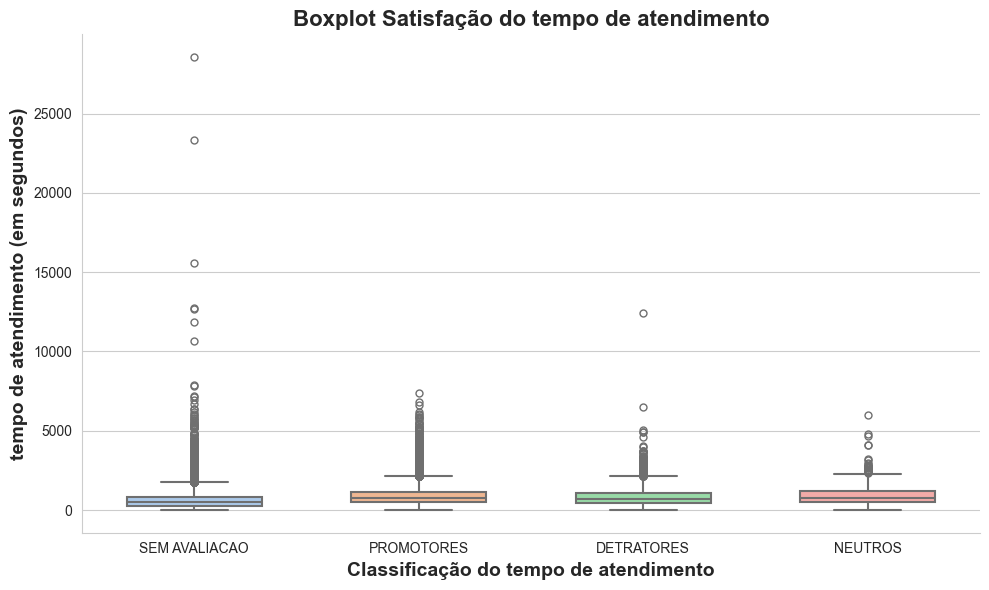

In [538]:
#Análise em relação ao tempo de atendimento da pesquisa

plt.figure(figsize=(10,6))


sns.set_style("whitegrid")

ax = sns.boxplot(
    data=df_estudo_canal_voz,
    x='NPS_CANAL_VOZ',      
    y='DURACAO_CONTATO_EM_SEG_CANAL_VOZ',          
    palette='pastel',   
    width=0.6,          
    fliersize=5,        
    linewidth=1.5       
)


ax.set_title("Boxplot Satisfação do tempo de atendimento", fontsize=16, fontweight='bold')
ax.set_xlabel("Classificação do tempo de atendimento", fontsize=14, fontweight='bold')
ax.set_ylabel("tempo de atendimento (em segundos)", fontsize=14, fontweight = 'bold')

sns.despine()

plt.tight_layout()
plt.show()

In [539]:
df_estudo_canal_voz['MEDIA_TEMPO_POR_ALUNO'] = df_estudo_canal_voz.groupby('código aluno (chave)')['DURACAO_CONTATO_EM_SEG_CANAL_VOZ'].transform('mean')
q = df_estudo_canal_voz['MEDIA_TEMPO_POR_ALUNO'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

df_estudo_canal_voz['Decil Tempo Atendimento'] = df_estudo_canal_voz['MEDIA_TEMPO_POR_ALUNO'].apply(
    lambda x: 'DECIL 1' if x <= q.loc[0.1] else
              'DECIL 2' if x <= q.loc[0.2] else
              'DECIL 3' if x <= q.loc[0.3] else
              'DECIL 4' if x <= q.loc[0.4] else
              'DECIL 5' if x <= q.loc[0.5] else
              'DECIL 6' if x <= q.loc[0.6] else
              'DECIL 7' if x <= q.loc[0.7] else
              'DECIL 8' if x <= q.loc[0.8] else
              'DECIL 9' if x <= q.loc[0.9] else
              'MÁXIMO'
)





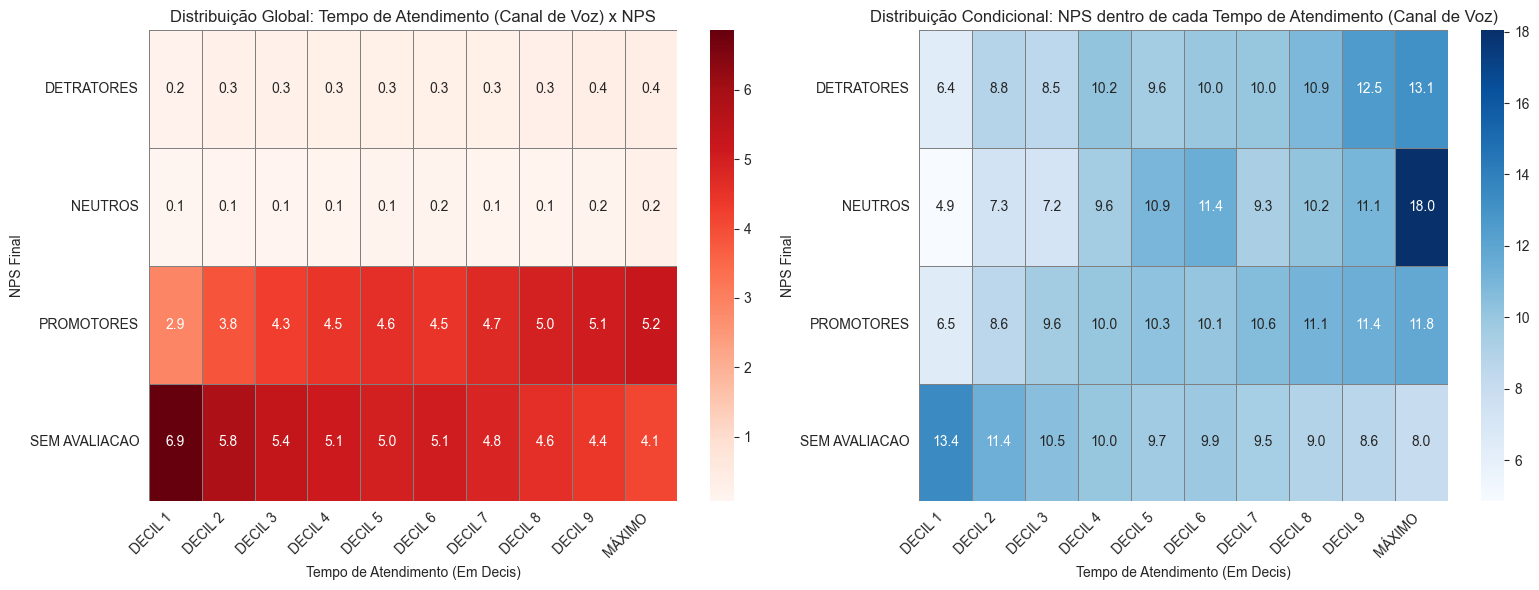

In [540]:
analise_tempo_atendimento_canal_voz = tabela_analise_global(df_estudo_canal_voz, 'NPS_CANAL_VOZ', 'Decil Tempo Atendimento') 
est_cond_tempo_atendimento_canal_voz= tabela_analise_condicional(df_estudo_canal_voz, 'NPS_CANAL_VOZ', 'Decil Tempo Atendimento')


est_global_tempo_atendimento_canal_voz = analise_tempo_atendimento_canal_voz.pivot(index='NPS_CANAL_VOZ', columns='Decil Tempo Atendimento', values='Percentual')

est_cond_tempo_atendimento_canal_voz_pivot = est_cond_tempo_atendimento_canal_voz.pivot(index='NPS_CANAL_VOZ', columns='Decil Tempo Atendimento', values='Percentual')




fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(est_global_tempo_atendimento_canal_voz, 
            annot=True, 
            cmap="Reds", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[0])

axes[0].set_title('Distribuição Global: Tempo de Atendimento (Canal de Voz) x NPS')
axes[0].set_xlabel('Tempo de Atendimento (Em Decis)')
axes[0].set_ylabel('NPS Final')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


sns.heatmap(est_cond_tempo_atendimento_canal_voz_pivot, 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[1])

axes[1].set_title('Distribuição Condicional: NPS dentro de cada Tempo de Atendimento (Canal de Voz)')
axes[1].set_xlabel('Tempo de Atendimento (Em Decis)')
axes[1].set_ylabel('NPS Final')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()


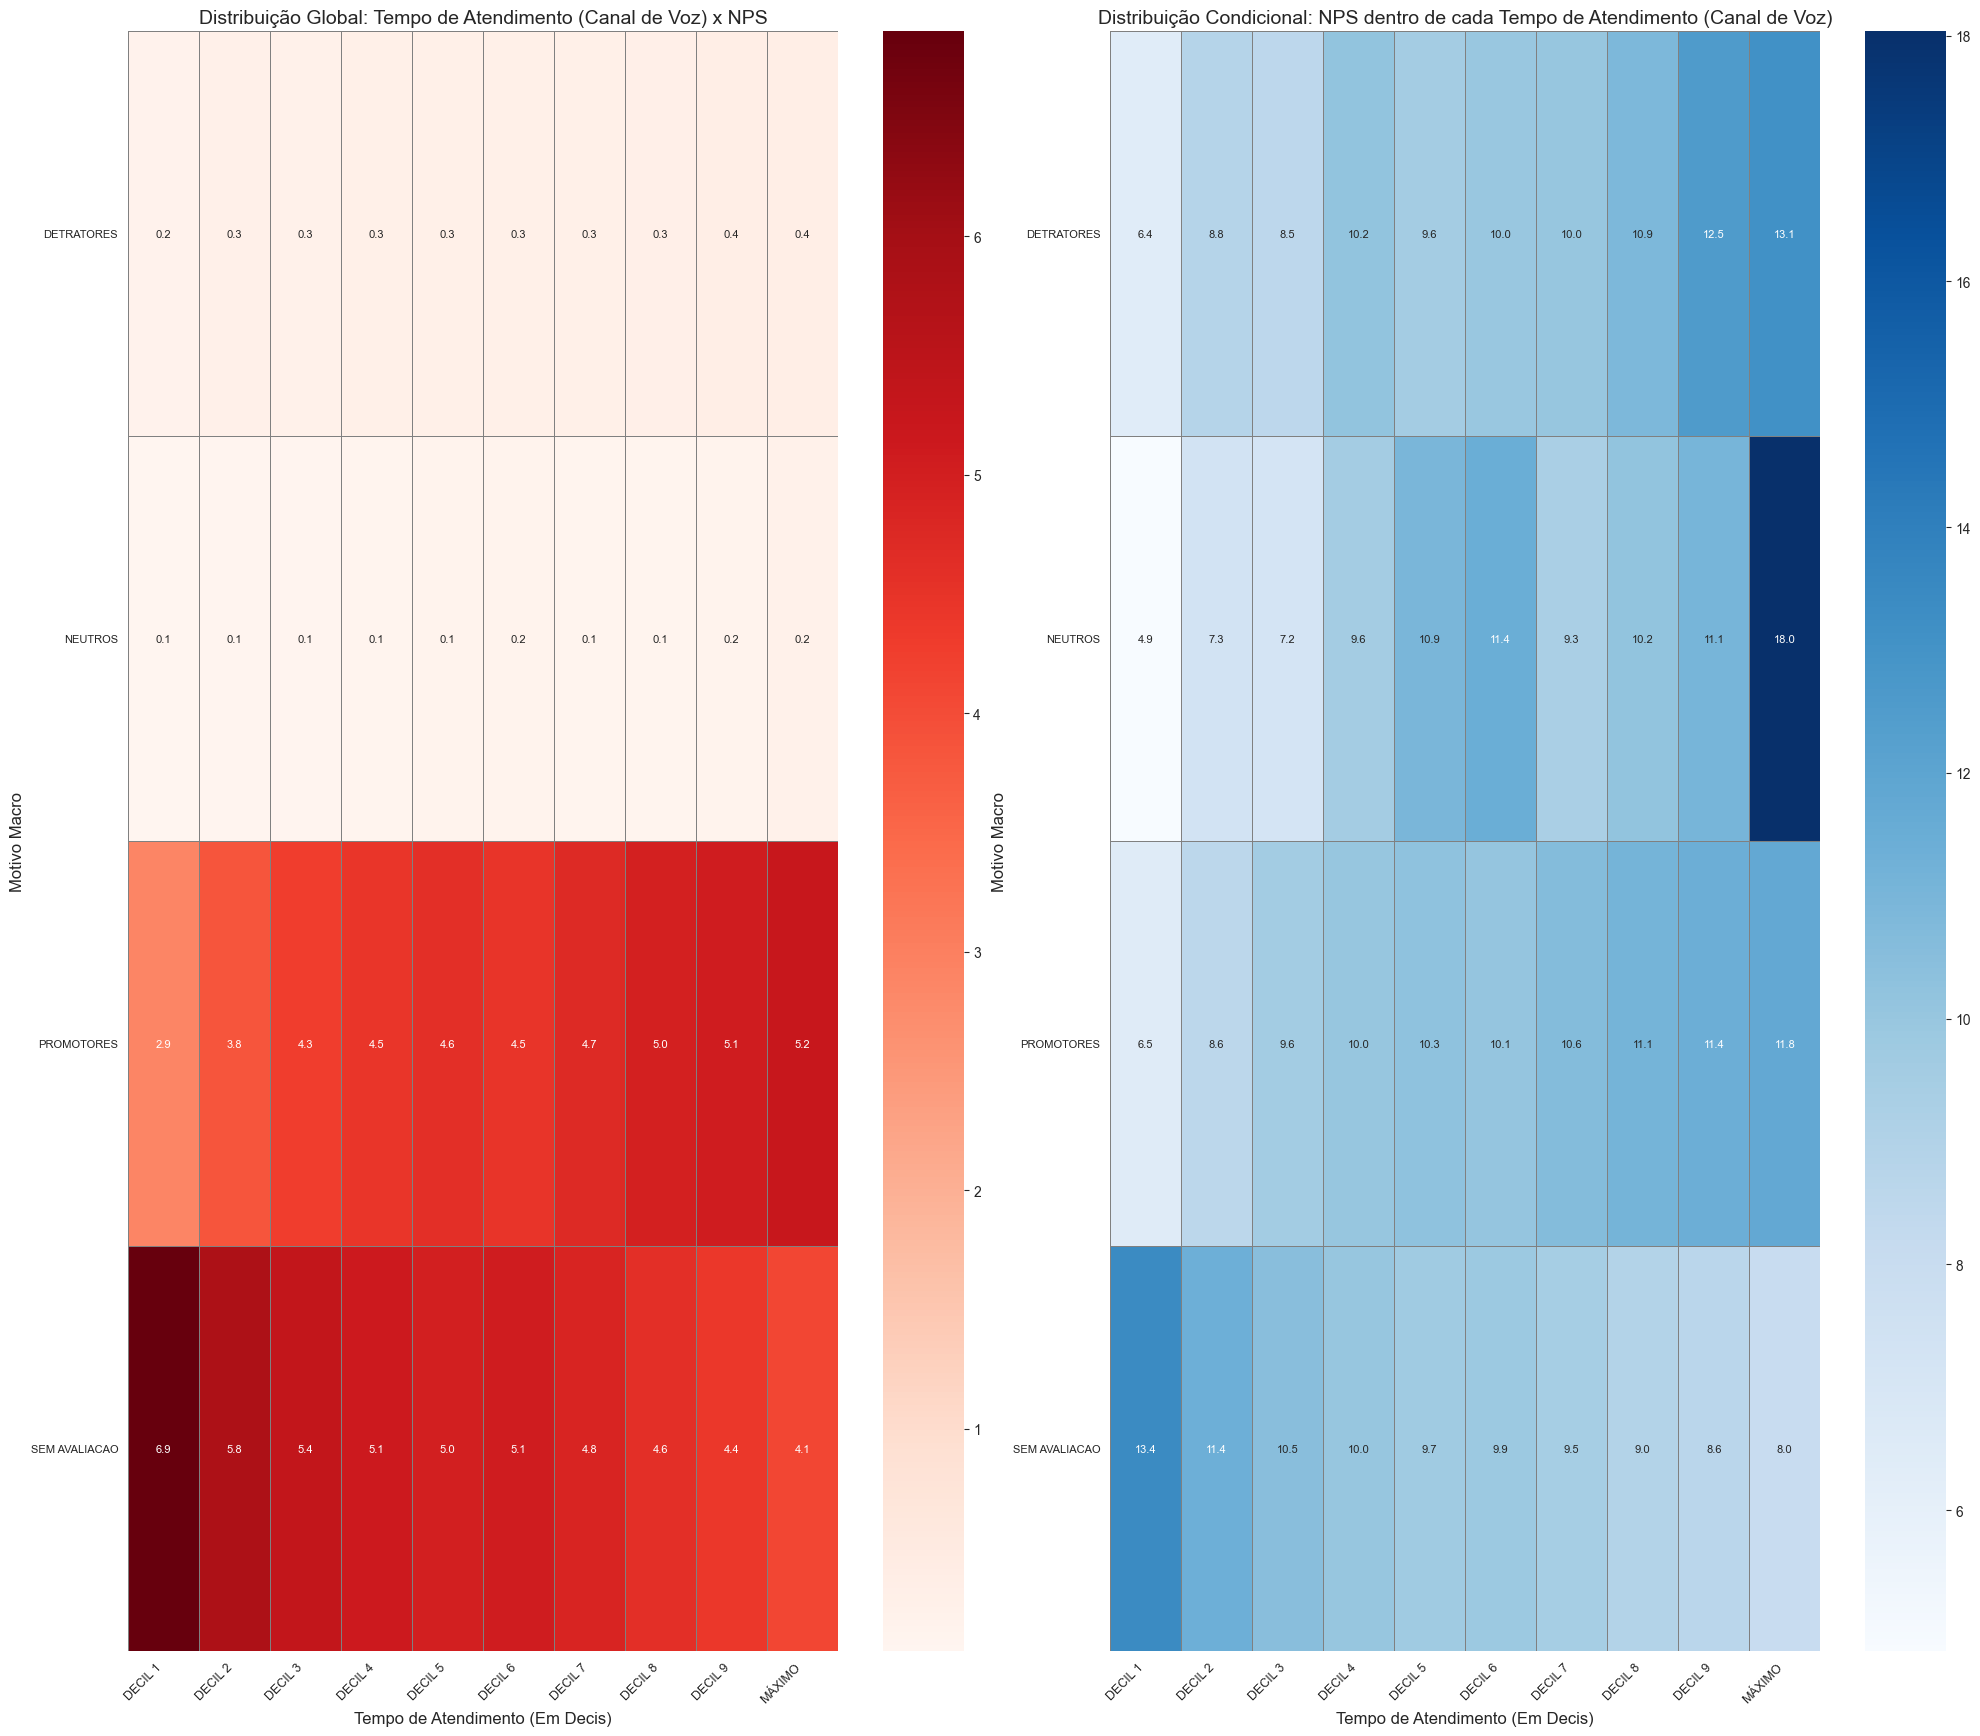

In [541]:
fig, axes = plt.subplots(1, 2, figsize=(22, 18))  # 👈 aumentei bastante na vertical

# Heatmap Global
sns.heatmap(
    est_global_tempo_atendimento_canal_voz, 
    annot=True, 
    annot_kws={'size':8}, 
    cmap="Reds", 
    fmt=".1f", 
    cbar=True, 
    linewidths=0.5, 
    linecolor='gray',
    ax=axes[0]
)

axes[0].set_title('Distribuição Global: Tempo de Atendimento (Canal de Voz) x NPS', fontsize=14)
axes[0].set_xlabel('Tempo de Atendimento (Em Decis)', fontsize=12)
axes[0].set_ylabel('Motivo Macro', fontsize=12)

axes[0].set_yticklabels(
    axes[0].get_yticklabels(), 
    rotation=0, 
    fontsize=8  # 👈 diminui bastante
)
axes[0].set_xticklabels(
    axes[0].get_xticklabels(), 
    rotation=45, 
    ha='right', 
    fontsize=9
)

# Heatmap Condicional
sns.heatmap(
    est_cond_tempo_atendimento_canal_voz_pivot, 
    annot=True, 
    annot_kws={'size':8}, 
    cmap="Blues", 
    fmt=".1f", 
    cbar=True, 
    linewidths=0.5, 
    linecolor='gray',
    ax=axes[1]
)

axes[1].set_title('Distribuição Condicional: NPS dentro de cada Tempo de Atendimento (Canal de Voz)', fontsize=14)
axes[1].set_xlabel('Tempo de Atendimento (Em Decis)', fontsize=12)
axes[1].set_ylabel('Motivo Macro', fontsize=12)

axes[1].set_yticklabels(
    axes[1].get_yticklabels(), 
    rotation=0, 
    fontsize=8
)
axes[1].set_xticklabels(
    axes[1].get_xticklabels(), 
    rotation=45, 
    ha='right', 
    fontsize=9
)

plt.tight_layout()

# 👇 Caso ainda fique espremido, ajuste manual:
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.05)

plt.show()


## 2.4 Análise do NPS por CSAT e outras categorias

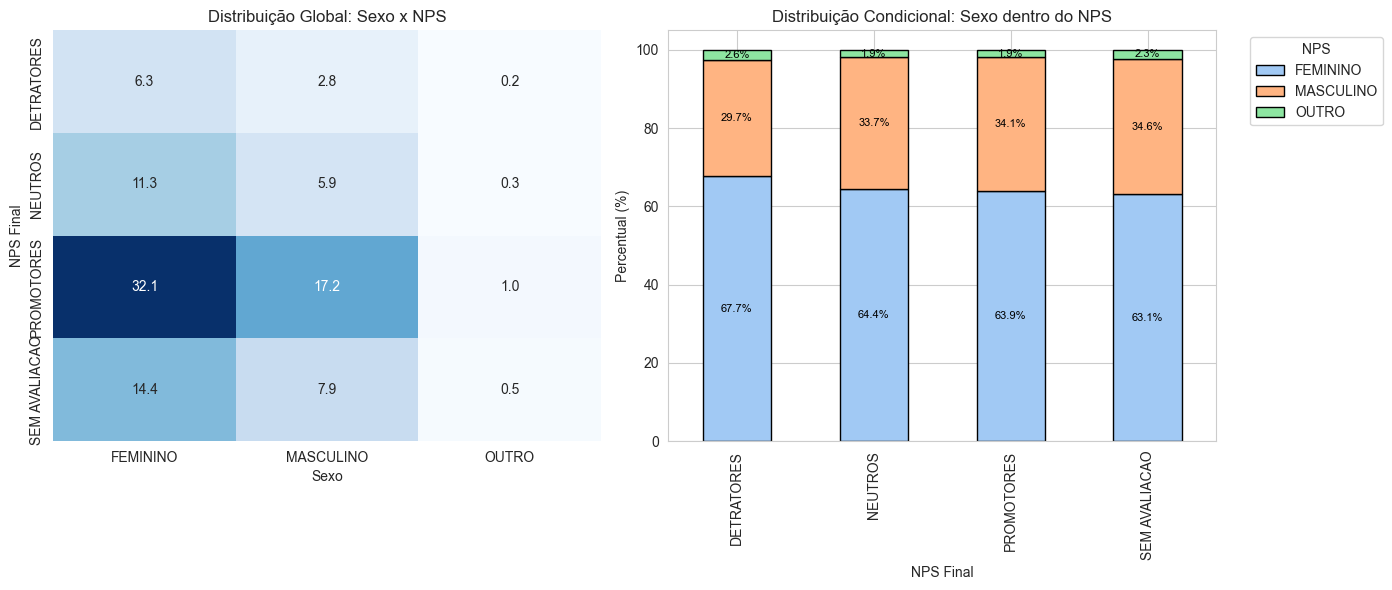

In [542]:
est_por_sexo = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'sexo')
est_cond_por_sexo = tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'sexo')


est_global_por_sexo = est_por_sexo.pivot(index='NPS_CATEGORIA', columns='sexo', values='Percentual')

est_condicional_por_sexo_pivot = est_cond_por_sexo.pivot(index='NPS_CATEGORIA', columns='sexo', values='Percentual')

colors = sns.color_palette("pastel", n_colors=est_condicional_por_sexo_pivot.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))



sns.heatmap(est_global_por_sexo, 
            ax=axes[0], 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=False)

axes[0].set_title('Distribuição Global: Sexo x NPS')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('NPS Final')


est_condicional_por_sexo_pivot.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[1], 
                                 color=colors,
                                 edgecolor='black')

axes[1].set_title('Distribuição Condicional: Sexo dentro do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[1].legend(title='NPS', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()


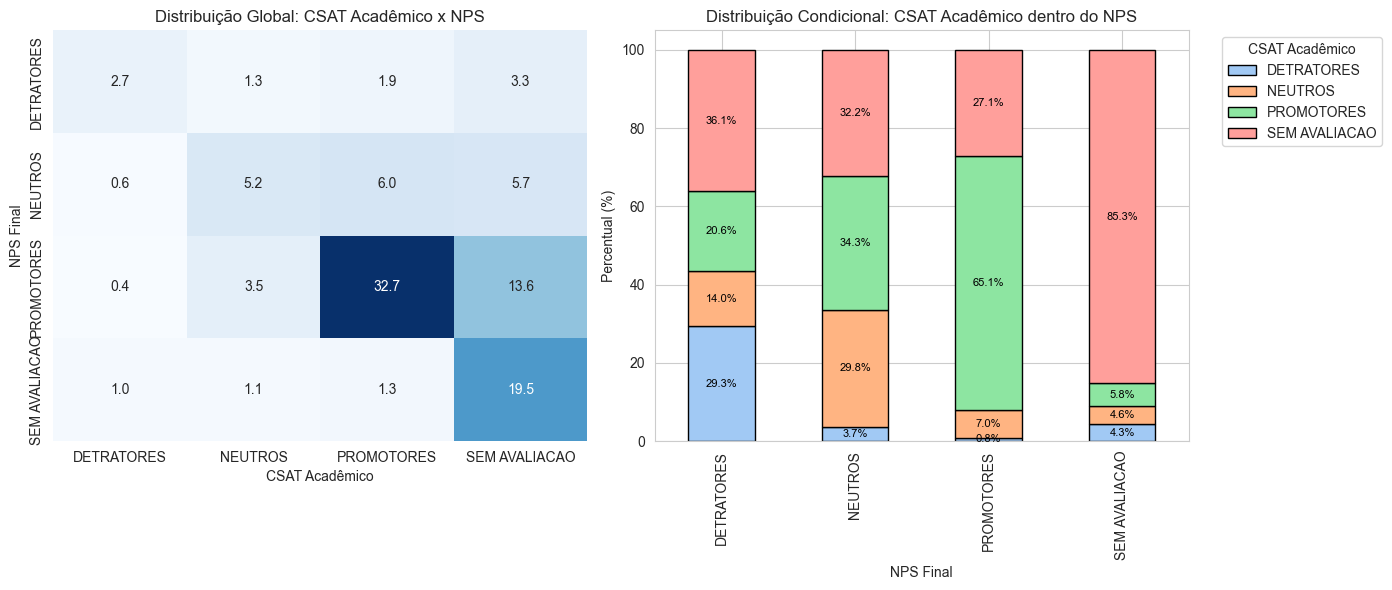

In [543]:
analise_por_csat_academico = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'CSAT_ACADEMICO_CATEGORIA') 
est_cond_por_csat_academico= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'CSAT_ACADEMICO_CATEGORIA')


est_global_csat_academico = analise_por_csat_academico.pivot(index='NPS_CATEGORIA', columns='CSAT_ACADEMICO_CATEGORIA', values='Percentual')

est_cond_por_csat_academico_pivot = est_cond_por_csat_academico.pivot(index='NPS_CATEGORIA', columns='CSAT_ACADEMICO_CATEGORIA', values='Percentual')




colors = sns.color_palette("pastel", n_colors=est_cond_por_csat_academico_pivot.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(est_global_csat_academico, 
            ax=axes[0], 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=False)

axes[0].set_title('Distribuição Global: CSAT Acadêmico x NPS')
axes[0].set_xlabel('CSAT Acadêmico')
axes[0].set_ylabel('NPS Final')


est_cond_por_csat_academico_pivot.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[1], 
                                 color=colors,
                                 edgecolor='black')

axes[1].set_title('Distribuição Condicional: CSAT Acadêmico dentro do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[1].legend(title='CSAT Acadêmico', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()


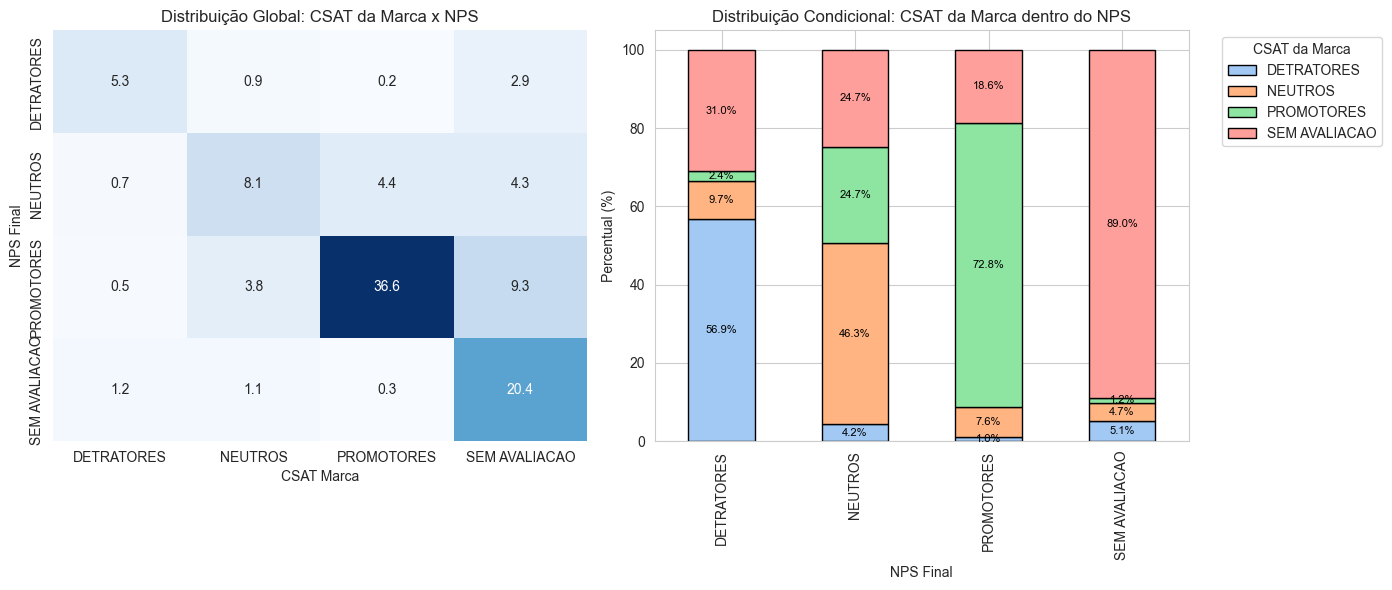

In [544]:
analise_por_csat_marca = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'CSAT_MARCA_CATEGORIA') 
est_cond_por_csat_marca= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'CSAT_MARCA_CATEGORIA')


est_global_csat_marca = analise_por_csat_marca.pivot(index='NPS_CATEGORIA', columns='CSAT_MARCA_CATEGORIA', values='Percentual')

est_cond_por_csat_marca_pivot = est_cond_por_csat_marca.pivot(index='NPS_CATEGORIA', columns='CSAT_MARCA_CATEGORIA', values='Percentual')




colors = sns.color_palette("pastel", n_colors=est_cond_por_csat_marca_pivot.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(est_global_csat_marca, 
            ax=axes[0], 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=False)

axes[0].set_title('Distribuição Global: CSAT da Marca x NPS')
axes[0].set_xlabel('CSAT Marca')
axes[0].set_ylabel('NPS Final')


est_cond_por_csat_marca_pivot.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[1], 
                                 color=colors,
                                 edgecolor='black')

axes[1].set_title('Distribuição Condicional: CSAT da Marca dentro do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[1].legend(title='CSAT da Marca', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()


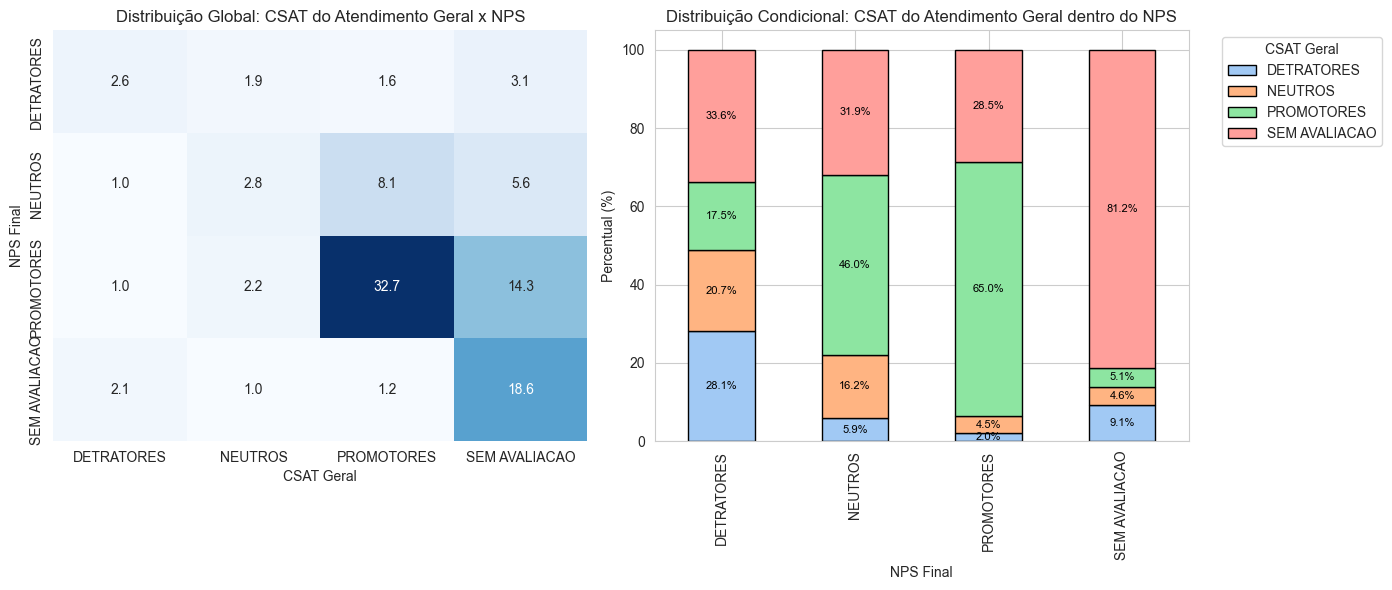

In [545]:
analise_por_csat_atendimento_geral = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'CSAT_ATEND_GERAL_CATEGORIA') 

est_cond_por_csat_atendimento_geral= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'CSAT_ATEND_GERAL_CATEGORIA')


est_global_csat_atendimento_geral = analise_por_csat_atendimento_geral.pivot(index='NPS_CATEGORIA', columns='CSAT_ATEND_GERAL_CATEGORIA', values='Percentual')

est_cond_por_csat_atendimento_geral_pivot = est_cond_por_csat_atendimento_geral.pivot(index='NPS_CATEGORIA', columns='CSAT_ATEND_GERAL_CATEGORIA', values='Percentual')




colors = sns.color_palette("pastel", n_colors=est_cond_por_csat_atendimento_geral_pivot.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(est_global_csat_atendimento_geral, 
            ax=axes[0], 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=False)

axes[0].set_title('Distribuição Global: CSAT do Atendimento Geral x NPS')
axes[0].set_xlabel('CSAT Geral')
axes[0].set_ylabel('NPS Final')


est_cond_por_csat_atendimento_geral_pivot.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[1], 
                                 color=colors,
                                 edgecolor='black')

axes[1].set_title('Distribuição Condicional: CSAT do Atendimento Geral dentro do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[1].legend(title='CSAT Geral', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()


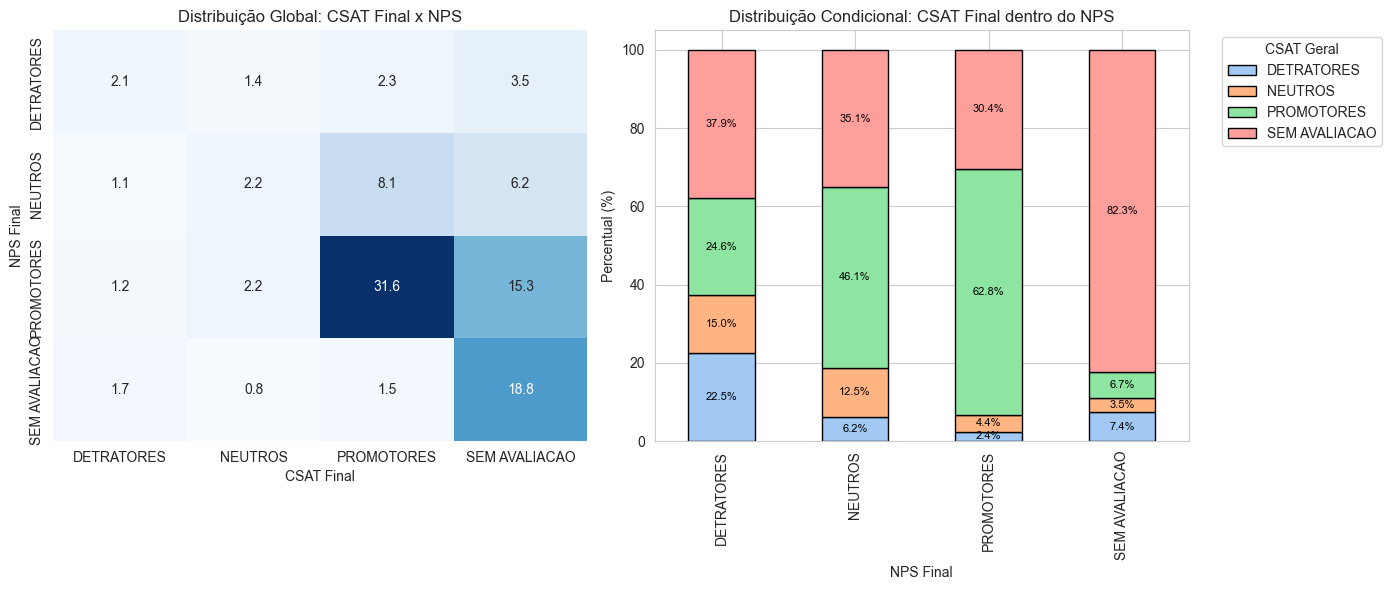

In [546]:
analise_por_csat_atendimento_final = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'CSAT_FINAL_GERAL') 

est_cond_por_csat_atendimento_final= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'CSAT_FINAL_GERAL')


est_global_csat_atendimento_geral = analise_por_csat_atendimento_final.pivot(index='NPS_CATEGORIA', columns='CSAT_FINAL_GERAL', values='Percentual')

est_cond_por_csat_atendimento_final_pivot = est_cond_por_csat_atendimento_final.pivot(index='NPS_CATEGORIA', columns='CSAT_FINAL_GERAL', values='Percentual')




colors = sns.color_palette("pastel", n_colors=est_cond_por_csat_atendimento_final.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(est_global_csat_atendimento_geral, 
            ax=axes[0], 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=False)

axes[0].set_title('Distribuição Global: CSAT Final x NPS')
axes[0].set_xlabel('CSAT Final')
axes[0].set_ylabel('NPS Final')


est_cond_por_csat_atendimento_final_pivot.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[1], 
                                 color=colors,
                                 edgecolor='black')

axes[1].set_title('Distribuição Condicional: CSAT Final dentro do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[1].legend(title='CSAT Geral', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()


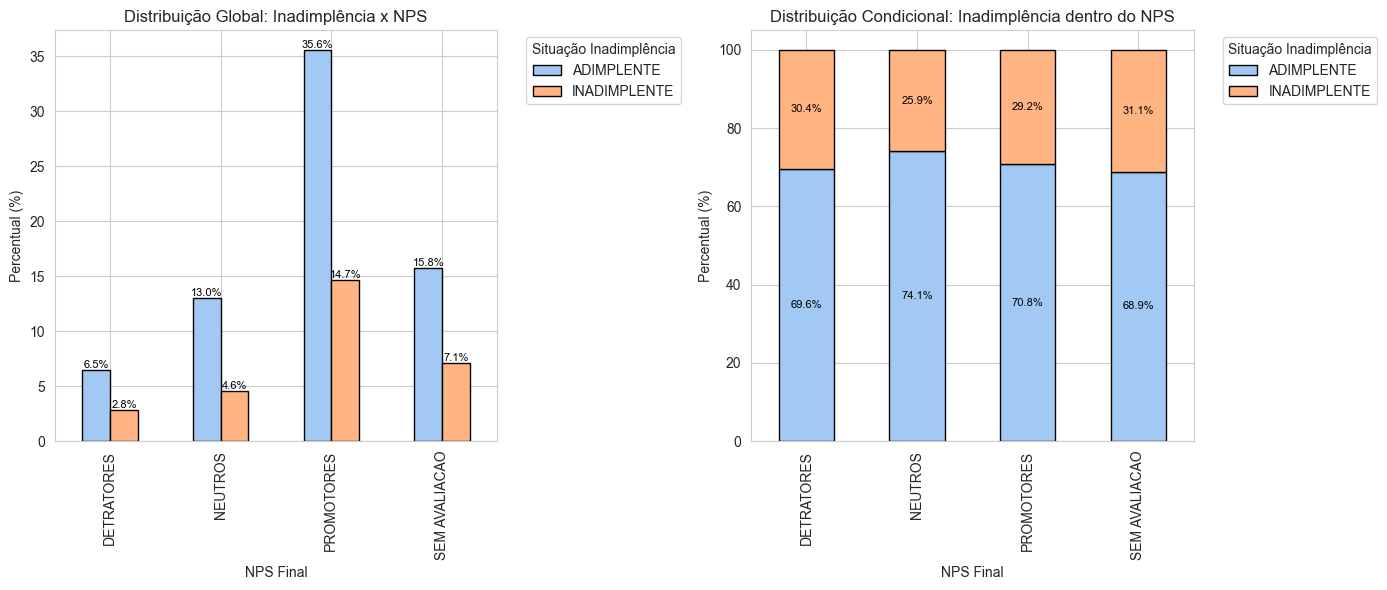

In [547]:
analise_por_inadimplente = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'fl_inadimplente') 

est_cond_por_csat_inadimplente= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'fl_inadimplente')


est_global_por_csat_inadimplente = analise_por_inadimplente.pivot(index='NPS_CATEGORIA', columns='fl_inadimplente', values='Percentual')

est_cond_por_csat_inadimplente_pivot = est_cond_por_csat_inadimplente.pivot(index='NPS_CATEGORIA', columns='fl_inadimplente', values='Percentual')



colors = sns.color_palette("pastel", n_colors=est_cond_por_csat_inadimplente.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

est_global_por_csat_inadimplente.plot(kind='bar', 
                                       ax=axes[0], 
                                       color=colors,
                                       edgecolor='black')

axes[0].set_title('Distribuição Global: Inadimplência x NPS')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_xlabel('NPS Final')


for container in axes[0].containers:
    axes[0].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='edge', 
                      color='black', 
                      fontsize=8)


est_cond_por_csat_inadimplente_pivot.plot(kind='bar', 
                                     stacked=True, 
                                     ax=axes[1], 
                                     color=colors,
                                     edgecolor='black')

axes[1].set_title('Distribuição Condicional: Inadimplência dentro do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[0].legend(title='Situação Inadimplência', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')

axes[1].legend(title='Situação Inadimplência', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()



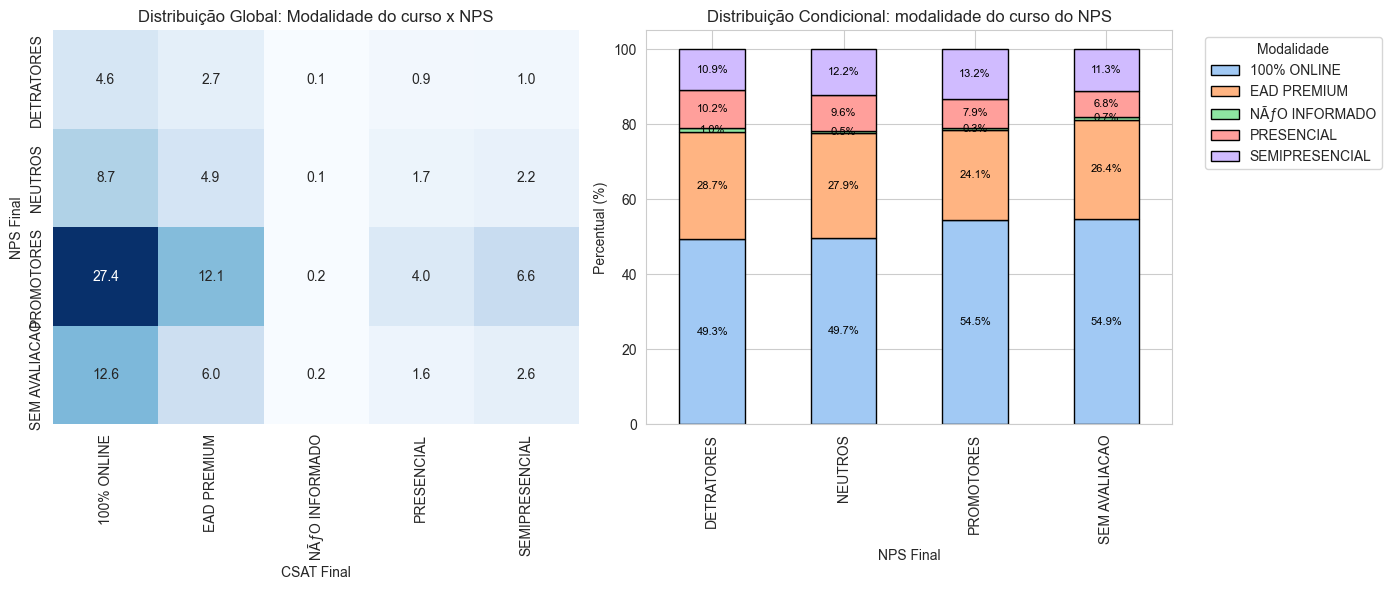

In [548]:
analise_por_modalidade = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'modalidade_micro') 

est_cond_por_modalidade= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'modalidade_micro')


est_global_modalidade = analise_por_modalidade.pivot(index='NPS_CATEGORIA', columns='modalidade_micro', values='Percentual')

est_cond_por_modalidade_pivot = est_cond_por_modalidade.pivot(index='NPS_CATEGORIA', columns='modalidade_micro', values='Percentual')




colors = sns.color_palette("pastel", n_colors=est_cond_por_modalidade_pivot.shape[1])


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.heatmap(est_global_modalidade, 
            ax=axes[0], 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=False)

axes[0].set_title('Distribuição Global: Modalidade do curso x NPS')
axes[0].set_xlabel('CSAT Final')
axes[0].set_ylabel('NPS Final')


est_cond_por_modalidade_pivot.plot(kind='bar', 
                                 stacked=True, 
                                 ax=axes[1], 
                                 color=colors,
                                 edgecolor='black')

axes[1].set_title('Distribuição Condicional: modalidade do curso do NPS')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('NPS Final')


for container in axes[1].containers:
    axes[1].bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center', 
                      color='black', 
                      fontsize=8)


axes[1].legend(title='Modalidade', 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')


plt.tight_layout()
plt.show()


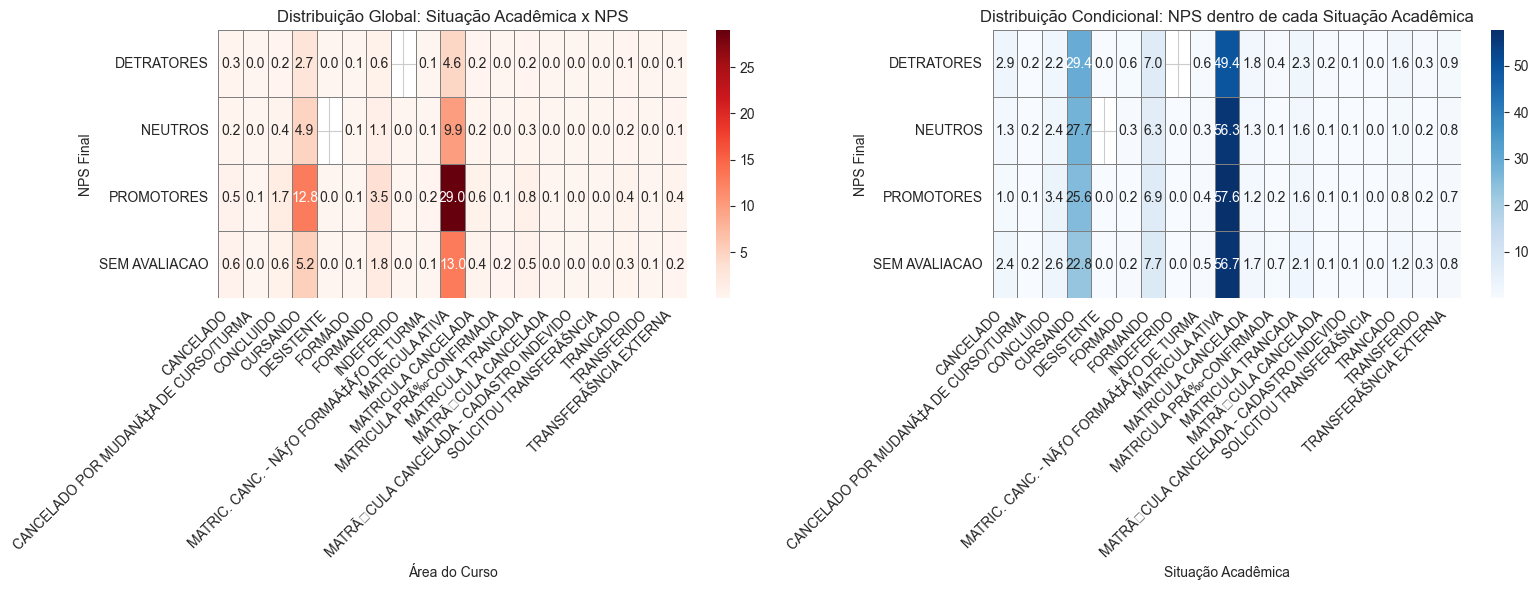

In [549]:
analise_por_situacao_academica = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'situacao_academica') 

est_cond_por_situacao_academica= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'situacao_academica')


est_global_por_situacao_academica = analise_por_situacao_academica.pivot(index='NPS_CATEGORIA', columns='situacao_academica', values='Percentual')

est_cond_por_situacao_academica_pivot = est_cond_por_situacao_academica.pivot(index='NPS_CATEGORIA', columns='situacao_academica', values='Percentual')







fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(est_global_por_situacao_academica, 
            annot=True, 
            cmap="Reds", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[0])

axes[0].set_title('Distribuição Global: Situação Acadêmica x NPS')
axes[0].set_xlabel('Área do Curso')
axes[0].set_ylabel('NPS Final')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


sns.heatmap(est_cond_por_situacao_academica_pivot, 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[1])

axes[1].set_title('Distribuição Condicional: NPS dentro de cada Situação Acadêmica')
axes[1].set_xlabel('Situação Acadêmica')
axes[1].set_ylabel('NPS Final')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()



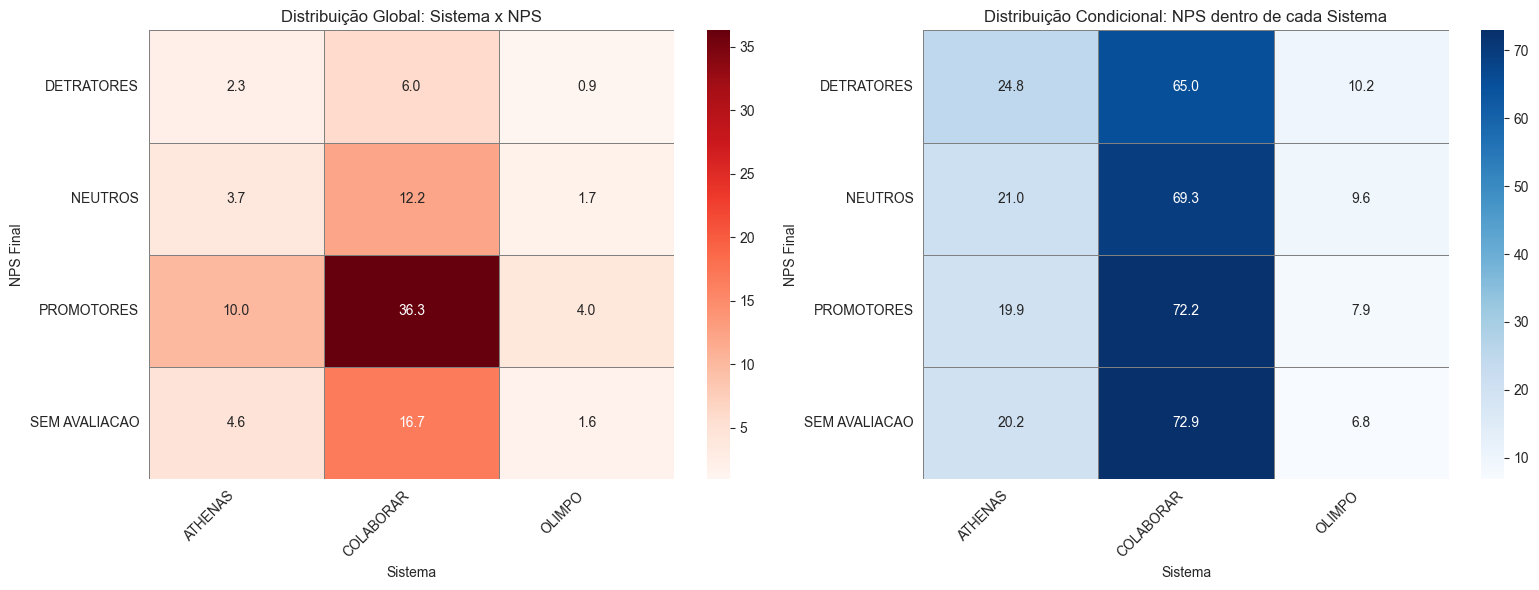

In [550]:
analise_por_sistema = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'sistema') 

est_cond_por_sistema= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'sistema')


est_global_por_sistema = analise_por_sistema.pivot(index='NPS_CATEGORIA', columns='sistema', values='Percentual')

est_cond_por_sistema_pivot = est_cond_por_sistema.pivot(index='NPS_CATEGORIA', columns='sistema', values='Percentual')







fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(est_global_por_sistema, 
            annot=True, 
            cmap="Reds", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[0])

axes[0].set_title('Distribuição Global: Sistema x NPS')
axes[0].set_xlabel('Sistema')
axes[0].set_ylabel('NPS Final')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


sns.heatmap(est_cond_por_sistema_pivot, 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[1])

axes[1].set_title('Distribuição Condicional: NPS dentro de cada Sistema')
axes[1].set_xlabel('Sistema')
axes[1].set_ylabel('NPS Final')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()



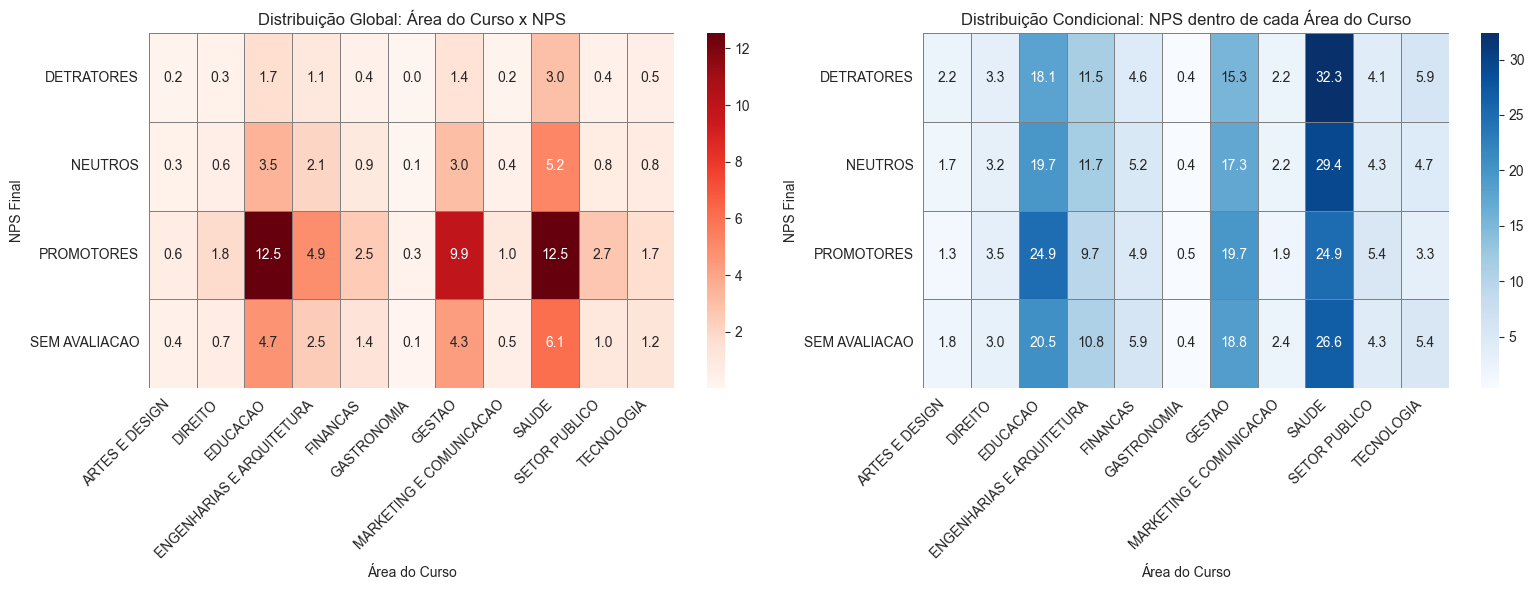

In [551]:
analise_por_curso = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'area_curso') 

est_cond_por_area_curso= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'area_curso')


est_global_curso = analise_por_curso.pivot(index='NPS_CATEGORIA', columns='area_curso', values='Percentual')

est_cond_por_area_curso_pivot = est_cond_por_area_curso.pivot(index='NPS_CATEGORIA', columns='area_curso', values='Percentual')







fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.heatmap(est_global_curso, 
            annot=True, 
            cmap="Reds", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[0])

axes[0].set_title('Distribuição Global: Área do Curso x NPS')
axes[0].set_xlabel('Área do Curso')
axes[0].set_ylabel('NPS Final')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


sns.heatmap(est_cond_por_area_curso_pivot, 
            annot=True, 
            cmap="Blues", 
            fmt=".1f", 
            cbar=True, 
            linewidths=0.5, 
            linecolor='gray',
            ax=axes[1])

axes[1].set_title('Distribuição Condicional: NPS dentro de cada Área do Curso')
axes[1].set_xlabel('Área do Curso')
axes[1].set_ylabel('NPS Final')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()



In [552]:
analise_por_curso = tabela_analise_global(df_nps, 'NPS_CATEGORIA', 'curso') 

est_cond_por_curso= tabela_analise_condicional(df_nps, 'NPS_CATEGORIA', 'curso')


est_global_curso = analise_por_curso.pivot(index='NPS_CATEGORIA', columns='curso', values='Percentual')

est_cond_por_curso_pivot = est_cond_por_curso.pivot(index='NPS_CATEGORIA', columns='curso', values='Percentual')









In [553]:
est_cond_por_curso[est_cond_por_curso['NPS_CATEGORIA'] == 'DETRATORES'].sort_values(by="Percentual", ascending=False).head(10).assign(PERCENTUAL_ACUMULADO = lambda x: x['Percentual'] + x['Percentual'].shift(-1))

,NPS_CATEGORIA,curso,Contagem,Percentual,PERCENTUAL_ACUMULADO
126,DETRATORES,PEDAGOGIA,1388,11.855142,23.522378
59,DETRATORES,ENFERMAGEM,1366,11.667236,17.876666
4,DETRATORES,ADMINISTRACAO,727,6.209429,9.634438
21,DETRATORES,CIENCIAS CONTABEIS,401,3.425009,6.815852
52,DETRATORES,EDUCACAO FISICA,397,3.390844,6.645029
13,DETRATORES,BIOMEDICINA,381,3.254185,6.354629
73,DETRATORES,FISIOTERAPIA,363,3.100444,5.927571
142,DETRATORES,SERVICO SOCIAL,331,2.827127,5.466348
71,DETRATORES,FARMACIA,309,2.639221,5.141783
123,DETRATORES,NUTRICAO,293,2.502562,NaN


In [555]:
analise_por_curso.pivot(index='curso', columns='NPS_CATEGORIA', values='Percentual').reset_index()
est_cond_por_curso.pivot(index='curso', columns='NPS_CATEGORIA', values='Percentual').reset_index()
est_cond_por_sistema

,NPS_CATEGORIA,sistema,Contagem,Percentual
7,PROMOTORES,COLABORAR,45757,72.202673
10,SEM AVALIACAO,COLABORAR,21066,72.945739
4,NEUTROS,COLABORAR,15373,69.338325
6,PROMOTORES,ATHENAS,12591,19.868083
1,DETRATORES,COLABORAR,7610,64.998292
9,SEM AVALIACAO,ATHENAS,5835,20.204993
8,PROMOTORES,OLIMPO,5025,7.929244
3,NEUTROS,ATHENAS,4664,21.036489
0,DETRATORES,ATHENAS,2908,24.837718
5,NEUTROS,OLIMPO,2134,9.625186


# 3.0 Desenvolvimento do modelo

## 3.1 Separação das Tabelas que serão utilizadas no modelo

In [556]:
tabela_est_curso =  est_cond_por_curso.pivot(index='curso', columns='NPS_CATEGORIA', values='Percentual').reset_index()
tabela_est_area_curso = est_cond_por_area_curso.pivot(index='area_curso', columns='NPS_CATEGORIA', values='Percentual').reset_index()
tabela_est_situacao_academica = est_cond_por_situacao_academica.pivot(index='situacao_academica', columns='NPS_CATEGORIA', values='Percentual')
tabela_est_csat_final = est_cond_por_csat_atendimento_final.pivot(index='CSAT_FINAL_GERAL', columns='NPS_CATEGORIA', values='Percentual')
est_cond_tempo_atendimento= tabela_analise_condicional(df_estudo_tempo_atendimento, 'resposta_tempo_atendimento', 'Decil Tempo Atendimento')


## 3.2 Construção da base principal do modelo

In [557]:
df_modelo = executa_query_dd(
    'Queries/Queire_principal.sql',
    tabelas={'df_nps': df_nps,
             "df_estudo_tempo_atendimento": df_estudo_tempo_atendimento,
             "df_estudo_canal_voz": df_estudo_canal_voz
             })

In [558]:
contagem_decis_por_aluno = df_estudo_tempo_atendimento.groupby('código aluno (chave)')['Decil Tempo Atendimento'].nunique()


df_estudo_tempo_atendimento.groupby('código aluno (chave)')['MEDIA_TEMPO_POR_ALUNO'].nunique().sort_values(ascending=False)

código aluno (chave)
0012c95939189f1f2e9c27551a1742861325deb1605ea493e7e8f9ff6004bd84    1
a820ad25bfcac9efa42fa00975a30c94d7d34e17086839aacc8e3ec3766f54f6    1
a61fd520f1b6ab0eaabd140ed29f4b40f44f69571b91ecc025f29cf23cb81025    1
a647600b6fb7ab79e6324b6ae6c0bd14f61a0127aa2bbc6a78de39031fd7df9d    1
a64bcbf7486bf414b0ab1c55aab2957b0c1186a0a54acfc844363da9567ec672    1
                                                                   ..
50a7041c001833188cd65e94e0a1511a630a40704805412faaa1228c75425223    1
50afc0375d5d162b4258c860b45bcde086f0119dda183a79523eb90093bae734    1
50b5f36733de0fa67ef1b0d9a20a0b90f4e1826f930793c2480aa1aa76a86306    1
50bd4a3ed64f95e6a11be6c98ed2bb32bb3c03371900e2666ba2aa51692373e7    1
fffce1f9905a949a3a34bb74a85f6a17445864f28f9b98c0d5974096b428ddfc    1
Name: MEDIA_TEMPO_POR_ALUNO, Length: 3124, dtype: int64

In [559]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126131 entries, 0 to 126130
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   NPS_FINAL                    126131 non-null  object        
 1   duracao_entrevista_segundos  126131 non-null  int64         
 2   data_pesquisa                126131 non-null  datetime64[ns]
 3   sexo                         126131 non-null  object        
 4   curso                        126131 non-null  object        
 5   tipo_aluno                   126131 non-null  object        
 6   area_curso                   126131 non-null  object        
 7   modalidade_micro             126131 non-null  object        
 8   sistema                      126131 non-null  object        
 9   fl_inadimplente              126131 non-null  object        
 10  situacao_academica           126131 non-null  object        
 11  canal                     

In [560]:
df_nps.columns

Index(['data_pesquisa', 'duração_entrevista', 'código aluno (chave)', 'sexo',
       'curso', 'tipo_aluno', 'area_curso', 'modalidade_micro', 'sistema',
       'fl_inadimplente', 'situacao_academica', 'canal', 'nps_nota',
       'csat_marca', 'csat_academico', 'csat_atend_geral', 'csat_fin_geral',
       'NPS_CATEGORIA', 'CSAT_MARCA_CATEGORIA', 'CSAT_ACADEMICO_CATEGORIA',
       'CSAT_ATEND_GERAL_CATEGORIA', 'CSAT_FINAL_GERAL'],
      dtype='object')

In [561]:
df_treino = df_modelo.sort_values(by="data_pesquisa", ascending=True)[df_modelo.index <= int(len(df_modelo)) * 0.8]
df_teste = df_modelo.sort_values(by="data_pesquisa", ascending=True)[df_modelo.index > int(len(df_modelo)) * 0.8]


In [562]:
df_teste['NPS_FINAL'].value_counts()


NPS_FINAL
PROMOTORES       12368
SEM AVALIACAO     6556
NEUTROS           3998
DETRATORES        2304
Name: count, dtype: int64

In [563]:
df_treino = df_treino[df_treino['NPS_FINAL'] !=  'SEM AVALIACAO' ]
df_teste = df_teste[df_teste['NPS_FINAL'] !=  'SEM AVALIACAO' ]
df_treino.drop(columns="data_pesquisa", inplace=True)
df_teste.drop(columns="data_pesquisa", inplace=True)

In [564]:
target = ['NPS_FINAL']
X_treino = df_treino.drop(columns='NPS_FINAL')
y_treino = df_treino['NPS_FINAL']

X_teste = df_teste.drop(columns='NPS_FINAL')
y_teste = df_teste['NPS_FINAL']

In [565]:
y_teste.unique()

array(['PROMOTORES', 'DETRATORES', 'NEUTROS'], dtype=object)

In [566]:
classificacoes =  list(X_treino.select_dtypes("object").columns)
X_treino[classificacoes]=  X_treino[classificacoes].astype("category")
X_teste[classificacoes] =  X_teste[classificacoes].astype("category")

X_treino = pd.get_dummies(X_treino, drop_first=False, dtype='int8')


X_teste = pd.get_dummies(X_teste, drop_first=False, dtype='int8')
X_teste = X_teste.reindex(columns=X_treino.columns, fill_value=0)


In [567]:
X_treino = X_treino.fillna(0)
X_teste = X_teste.fillna(0)

In [569]:

from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTETomek
import re



classificacoes = list(X_treino.select_dtypes("object").columns)


X_treino[classificacoes] = X_treino[classificacoes].astype("category")
X_teste[classificacoes] = X_teste[classificacoes].astype("category")


X_treino = pd.get_dummies(X_treino, drop_first=False, dtype='int8')
X_teste = pd.get_dummies(X_teste, drop_first=False, dtype='int8')

X_teste = X_teste.reindex(columns=X_treino.columns, fill_value=0)


le = LabelEncoder()
y_treino = le.fit_transform(y_treino.squeeze())
y_teste = le.transform(y_teste.squeeze())


print(f"X_treino shape: {X_treino.shape}")
print(f"X_teste shape: {X_teste.shape}")
print(f"y_treino shape: {y_treino.shape}, classes: {le.classes_}")
print(f"y_teste shape: {y_teste.shape}")

assert X_treino.isnull().sum().sum() == 0
assert X_teste.isnull().sum().sum() == 0
assert pd.Series(y_treino).isnull().sum() == 0



def clean_column_names(columns):
    cleaned = []
    for col in columns:
        new_col = re.sub(r'[^0-9a-zA-Z_]', '_', col)
        cleaned.append(new_col)
    return cleaned

X_treino.columns = clean_column_names(X_treino.columns)
X_teste.columns = clean_column_names(X_teste.columns)


le = LabelEncoder()
y_treino = le.fit_transform(y_treino.squeeze())
y_teste = le.transform(y_teste.squeeze())


contagem = Counter(y_treino)
classe_majoritaria = max(contagem, key=contagem.get)
qtd_majoritaria = contagem[classe_majoritaria]


sampling_strategy = {
    classe: int(qtd_majoritaria * 1.2) 
    for classe in contagem 
    if classe != classe_majoritaria
}

print("Sampling Strategy:", sampling_strategy)


smote_tomek = SMOTETomek(
    smote=SMOTE(sampling_strategy=sampling_strategy, random_state=42),
    random_state=42
)


X_res, y_res = smote_tomek.fit_resample(X_treino, y_treino)

print("Distribuição depois:", Counter(y_res))


automl = AutoML()

automl_settings = {
    "time_budget": 600,  
    "metric": 'macro_f1',
    "task": 'classification',
    "log_file_name": "nps_flaml.log",
    "n_jobs": -1,
    "eval_method": "cv",
    "verbose": 2,
    "seed": 42,
    "ensemble": True,
    "model_history": True,
    "estimator_list": [
        'lgbm',       
        'xgboost',   
        'rf',        
        'extra_tree',     
        'catboost'    
    ],
}


automl.fit(X_train=X_res, y_train=y_res, **automl_settings)


y_pred = automl.predict(X_teste)


target_names = [str(c) for c in le.classes_]




X_treino shape: (78582, 288)
X_teste shape: (18670, 288)
y_treino shape: (78582,), classes: ['DETRATORES' 'NEUTROS' 'PROMOTORES']
y_teste shape: (18670,)
Sampling Strategy: {0: 61206, 1: 61206}
Distribuição depois: Counter({0: 61061, 1: 60820, 2: 50690})
[flaml.automl.logger: 06-02 16:19:47] {1644} WARNING - With `model_history` set to `True` by default, all intermediate models are retained in memory, which may significantly increase memory usage and slow down training. Consider setting `model_history=False` to optimize memory and accelerate the training process.
[flaml.automl.logger: 06-02 16:31:53] {2020} WARNING - Time taken to find the best model is 85% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.


In [570]:
print("\n✅ Melhor modelo encontrado:", automl.model)
print("\n✅ Acurácia:", accuracy_score(y_teste, y_pred))
mapping = {0: "detratores", 1: "neutros", 2: "promotores"}

y_pred_names = [mapping[i] for i in y_pred]
y_teste_names = [mapping[i] for i in y_teste]

print(classification_report(y_teste_names, y_pred_names))

print("\n✅ Confusion Matrix:\n", confusion_matrix(y_teste, y_pred))



✅ Melhor modelo encontrado: StackingClassifier(estimators=[('lgbm',
                                <flaml.automl.model.LGBMEstimator object at 0x000001BBCB06A990>),
                               ('xgboost',
                                <flaml.automl.model.XGBoostSklearnEstimator object at 0x000001BBCB0696A0>),
                               ('rf',
                                <flaml.automl.model.RandomForestEstimator object at 0x000001BBCB06A120>),
                               ('extra_tree',
                                <flaml.automl.model.ExtraTreesEstimator object at 0x000001BBCB069520>)],
                   n_jobs=1, passthrough=True)

✅ Acurácia: 0.7520621317621853
              precision    recall  f1-score   support

  detratores       0.67      0.65      0.66      2304
     neutros       0.51      0.56      0.53      3998
  promotores       0.85      0.83      0.84     12368

    accuracy                           0.75     18670
   macro avg       0.68      0.68   

In [571]:

for idx, model in enumerate(automl.model.estimators_):
    print(f"\n➡️ Modelo {idx + 1}: {model}")

    
    if hasattr(model.model, 'feature_importances_'):
        importances = model.model.feature_importances_
        feat_imp = pd.Series(importances, index=X_treino.columns).sort_values(ascending=False)

        print("\nTop 10 Features mais importantes:")
        print(feat_imp.head(10))
    else:
        print("⚠️ Este modelo não possui 'feature_importances_'.")



➡️ Modelo 1: <flaml.automl.model.LGBMEstimator object at 0x000001BBCB0684A0>

Top 10 Features mais importantes:
duracao_entrevista_segundos    108214
csat_marca                      23806
csat_academico                  21903
csat_atend_geral                16068
csat_fin_geral                  15997
fl_inadimplente_ADIMPLENTE       4880
sexo_FEMININO                    4478
canal_Polo                       4213
canal_Campus                     4157
sexo_MASCULINO                   3988
dtype: int32

➡️ Modelo 2: <flaml.automl.model.XGBoostSklearnEstimator object at 0x000001BBC0E43470>

Top 10 Features mais importantes:
CSAT_MARCA_CATEGORIA_PROMOTORES             0.175651
CSAT_MARCA_CATEGORIA_SEM_AVALIACAO          0.161218
CSAT_MARCA_CATEGORIA_DETRATORES             0.116810
CSAT_MARCA_CATEGORIA_NEUTROS                0.101967
csat_marca                                  0.069627
canal_Campus                                0.021566
CSAT_ATEND_GERAL_CATEGORIA_SEM_AVALIACAO    0.020277
